In [1]:
# 04_Analisis_SHAP.ipynb

# ==============================================================================
# ANÁLISIS DE INTERPRETABILIDAD CON SHAP
# ==============================================================================

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # Para cargar modelos y preprocesador
import shap # La librería SHAP

# Configuración de Matplotlib y Seaborn para gráficos más bonitos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("--------------------------------------------------")
print("INICIANDO ANÁLISIS DE INTERPRETABILIDAD CON SHAP...")
print("--------------------------------------------------")

# Definir las rutas a los datos preprocesados, modelos y preprocesador
data_processed_dir = os.path.join(os.getcwd(), '..', 'data', 'processed')
models_dir = os.path.join(os.getcwd(), '..', 'models')
plots_dir = os.path.join(os.getcwd(), '..', 'plots')

X_test_path = os.path.join(data_processed_dir, 'X_test.csv')
y_test_path = os.path.join(data_processed_dir, 'y_test.csv')
preprocessor_path = os.path.join(data_processed_dir, 'preprocessor.joblib')

# Asegurar que la carpeta 'plots' exista
os.makedirs(plots_dir, exist_ok=True)
print(f"Directorio para gráficos '{plots_dir}' asegurado/creado.")

C:\Users\Víctor\Documents\PaintFormulatorAI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--------------------------------------------------
INICIANDO ANÁLISIS DE INTERPRETABILIDAD CON SHAP...
--------------------------------------------------
Directorio para gráficos 'C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots' asegurado/creado.


In [2]:
# Cargar X_test, y_test y el preprocesador
try:
    X_test = pd.read_csv(X_test_path)
    y_test = pd.read_csv(y_test_path).squeeze() # .squeeze() es crucial para que sea una Serie
    preprocessor = joblib.load(preprocessor_path)
    print(f"X_test, y_test y preprocesador cargados exitosamente.")
except FileNotFoundError:
    print(f"ERROR: No se encontraron los archivos necesarios en: {data_processed_dir}")
    print("Asegúrate de haber ejecutado '02_Preprocesamiento_y_Seleccion_Caracteristicas.ipynb' previamente.")
    exit()

# Cargar los modelos entrenados
models = {}
try:
    models['Logistic Regression'] = joblib.load(os.path.join(models_dir, 'logistic_regression_model.joblib'))
    models['Random Forest'] = joblib.load(os.path.join(models_dir, 'random_forest_model.joblib'))
    models['XGBoost'] = joblib.load(os.path.join(models_dir, 'xgboost_model.joblib'))
    if os.path.exists(os.path.join(models_dir, 'lightgbm_model.joblib')): # Cargar LightGBM solo si existe
        models['LightGBM'] = joblib.load(os.path.join(models_dir, 'lightgbm_model.joblib'))
    print(f"Modelos cargados exitosamente desde: {models_dir}")
except FileNotFoundError:
    print(f"ERROR: No se encontraron los modelos entrenados en: {models_dir}")
    print("Asegúrate de haber ejecutado '03_Modelado_y_Evaluacion.ipynb' previamente.")
    exit()

print("\nExplicación para Leonardo (Preparación para SHAP):")
print("Para entender por qué el modelo hace una predicción, necesitamos los datos con los que el modelo fue entrenado (X_test)")
print("y el 'preprocesador' que usamos para transformar los datos originales a un formato que el modelo entiende.")
print("También cargamos los modelos entrenados para que SHAP pueda 'interrogarlos' y entender su lógica interna.")
print("Esta etapa nos permite ir más allá de 'qué tan bueno es el modelo' a 'por qué el modelo predice lo que predice'.")

X_test, y_test y preprocesador cargados exitosamente.
Modelos cargados exitosamente desde: C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\models

Explicación para Leonardo (Preparación para SHAP):
Para entender por qué el modelo hace una predicción, necesitamos los datos con los que el modelo fue entrenado (X_test)
y el 'preprocesador' que usamos para transformar los datos originales a un formato que el modelo entiende.
También cargamos los modelos entrenados para que SHAP pueda 'interrogarlos' y entender su lógica interna.
Esta etapa nos permite ir más allá de 'qué tan bueno es el modelo' a 'por qué el modelo predice lo que predice'.


In [3]:
# Para que las explicaciones SHAP sean significativas, necesitamos los nombres
# de las características tal como las conocemos (ej., 'calidad_resina_Alta' en lugar de 'x0', 'x1').
# El preprocesador es clave para esto.

# Obtener nombres de características después del preprocesamiento
# Esto es vital para la interpretabilidad de los gráficos SHAP
feature_names_processed = X_test.columns.tolist()

print("\nNombres de características post-procesamiento obtenidos.")

print("\nExplicación para Leonardo (Nombres de Características):")
print("Recuerde que transformamos las características como 'calidad_resina' en columnas como 'calidad_resina_Alta'.")
print("Para que los resultados de SHAP tengan sentido para usted, necesitamos usar estos nombres claros y específicos.")
print("Así, cuando el modelo nos diga qué fue importante, sabremos exactamente a qué se refiere.")


Nombres de características post-procesamiento obtenidos.

Explicación para Leonardo (Nombres de Características):
Recuerde que transformamos las características como 'calidad_resina' en columnas como 'calidad_resina_Alta'.
Para que los resultados de SHAP tengan sentido para usted, necesitamos usar estos nombres claros y específicos.
Así, cuando el modelo nos diga qué fue importante, sabremos exactamente a qué se refiere.



--------------------------------------------------
3. ANÁLISIS SHAP GLOBAL (IMPORTANCIA GENERAL)
--------------------------------------------------

Calculando valores SHAP para el modelo: Random Forest

--- ¡ATENCIÓN! REQUERIMOS ESTA SALIDA PARA DIAGNOSTICAR ---
Forma de X_test.values (datos de entrada a SHAP): (1000, 25)
Tipo de shap_values_global: array 3D (multi-output binario, como se encontró).
Forma de shap_values_global: (1000, 25, 2)
Forma de shap_values_for_plot (usado en plots): (1000, 25)
Número de características procesadas (feature_names_processed): 25
--- FIN DE SALIDA DE DEPURACIÓN CRÍTICA ---
Valores SHAP calculados. Generando gráfico de resumen global...


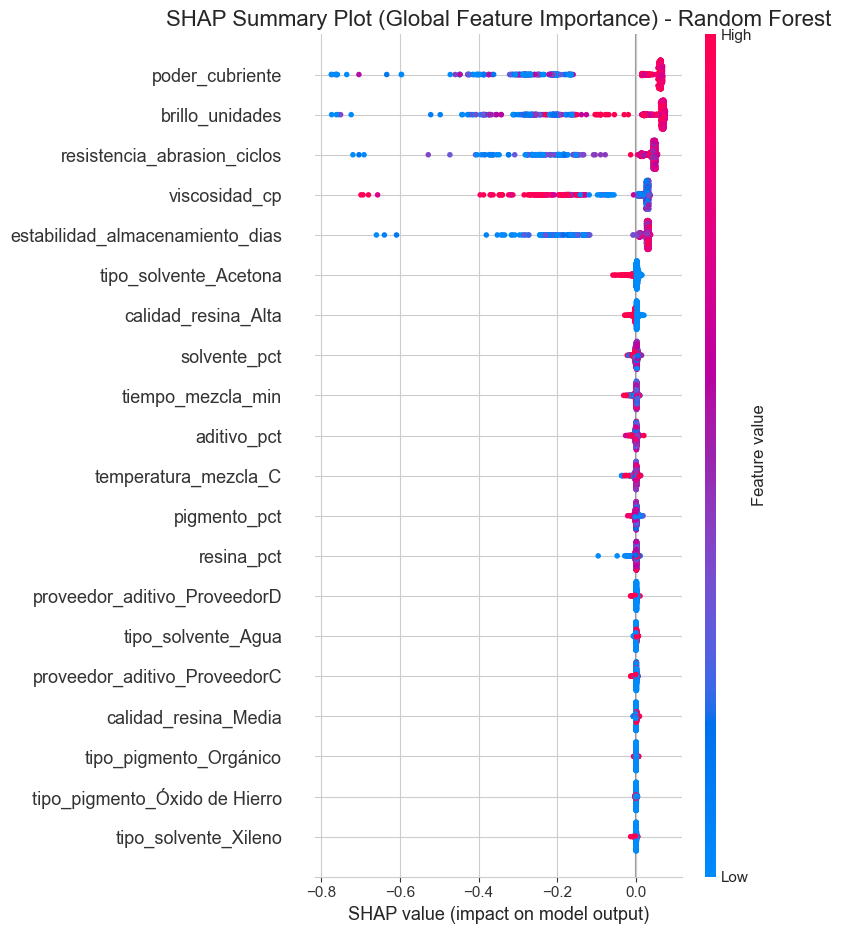

Gráfico 'shap_summary_global_Random_Forest.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (SHAP Global):
Este gráfico es una visión general de cómo las características impactan el resultado del modelo.
  - El eje Y muestra las características, ordenadas por su importancia general (cuánto contribuyen a la predicción).
  - El eje X muestra el valor SHAP (el impacto en la predicción).
  - Cada punto representa una formulación. El color (rojo a azul) indica el valor de la característica para esa formulación (rojo=alto, azul=bajo).
  - Por ejemplo, si 'resina_pct' es una característica importante y los puntos rojos (alto porcentaje de resina)
    tienden a estar en el lado positivo del eje X (hacia 'Éxito'), significa que un alto porcentaje de resina impulsa al éxito.
Este gráfico es su **mapa de calor general** sobre qué factores son los más relevantes para el modelo.
Confirma (o desafía) sus conocimientos sobre los factores críti

In [4]:
print("\n--------------------------------------------------")
print("3. ANÁLISIS SHAP GLOBAL (IMPORTANCIA GENERAL)")
print("--------------------------------------------------")

# Elegir un modelo para el análisis SHAP global.
model_to_explain_global = models['Random Forest'] # O 'XGBoost', 'LightGBM'
model_name_global = 'Random Forest'

print(f"\nCalculando valores SHAP para el modelo: {model_name_global}")

explainer_global = shap.TreeExplainer(model_to_explain_global)
shap_values_global = explainer_global.shap_values(X_test.values)

# --- INICIO DE LÍNEAS DE DEPURACIÓN (CRÍTICAS PARA DIAGNÓSTICO) ---
print("\n--- ¡ATENCIÓN! REQUERIMOS ESTA SALIDA PARA DIAGNOSTICAR ---")
print(f"Forma de X_test.values (datos de entrada a SHAP): {X_test.values.shape}")

# Determine the correct shap_values_for_plot based on the actual shape of shap_values_global
if isinstance(shap_values_global, list):
    print(f"Tipo de shap_values_global: lista de {len(shap_values_global)} arrays.")
    print(f"Forma de shap_values_global[0] (clase 'Falla'): {shap_values_global[0].shape}")
    print(f"Forma de shap_values_global[1] (valores SHAP para clase 'Éxito'): {shap_values_global[1].shape}")
    shap_values_for_plot = shap_values_global[1] # Seleccionar los valores SHAP para la clase positiva
elif isinstance(shap_values_global, np.ndarray) and shap_values_global.ndim == 3 and shap_values_global.shape[2] == 2:
    print(f"Tipo de shap_values_global: array 3D (multi-output binario, como se encontró).")
    print(f"Forma de shap_values_global: {shap_values_global.shape}")
    shap_values_for_plot = shap_values_global[:, :, 1]
else:
    print(f"Tipo de shap_values_global: array (forma inesperada para clasificación binaria).")
    print(f"Forma de shap_values_global: {shap_values_global.shape}")
    shap_values_for_plot = shap_values_global 

print(f"Forma de shap_values_for_plot (usado en plots): {shap_values_for_plot.shape}")
print(f"Número de características procesadas (feature_names_processed): {len(feature_names_processed)}")
print("--- FIN DE SALIDA DE DEPURACIÓN CRÍTICA ---")

print("Valores SHAP calculados. Generando gráfico de resumen global...")

plt.figure(figsize=(12, 8))

try:
    if shap_values_for_plot.shape != X_test.values.shape:
        raise ValueError(
            f"La forma final de shap_values_for_plot ({shap_values_for_plot.shape}) "
            f"no coincide con X_test.values ({X_test.values.shape})."
        )
    shap.summary_plot(shap_values_for_plot, X_test.values, feature_names=feature_names_processed, show=False)

except Exception as e:
    print(f"FALLO CRÍTICO en shap.summary_plot. Error: {e}")
    print("\nEl problema no es una columna extra, sino una discrepancia fundamental en las dimensiones.")
    print("Por favor, asegúrate de haber re-ejecutado `02_Preprocesamiento_y_Seleccion_Caracteristicas.ipynb`")
    print("y `03_Modelado_y_Evaluacion.ipynb` **en ese orden y completamente** antes de ejecutar este notebook.")
    print("Si el problema persiste, considera actualizar tu librería SHAP (`pip install --upgrade shap`).")
    raise

plt.title(f'SHAP Summary Plot (Global Feature Importance) - {model_name_global}', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, f'shap_summary_global_{model_name_global.replace(" ", "_")}.png'))
plt.show()
print(f"Gráfico 'shap_summary_global_{model_name_global.replace(' ', '_')}.png' guardado en {plots_dir}")

print("\nExplicación para Leonardo (SHAP Global):")
print("Este gráfico es una visión general de cómo las características impactan el resultado del modelo.")
print("  - El eje Y muestra las características, ordenadas por su importancia general (cuánto contribuyen a la predicción).")
print("  - El eje X muestra el valor SHAP (el impacto en la predicción).")
print("  - Cada punto representa una formulación. El color (rojo a azul) indica el valor de la característica para esa formulación (rojo=alto, azul=bajo).")
print("  - Por ejemplo, si 'resina_pct' es una característica importante y los puntos rojos (alto porcentaje de resina)")
print("    tienden a estar en el lado positivo del eje X (hacia 'Éxito'), significa que un alto porcentaje de resina impulsa al éxito.")
print("Este gráfico es su **mapa de calor general** sobre qué factores son los más relevantes para el modelo.")
print("Confirma (o desafía) sus conocimientos sobre los factores críticos en la formulación de pinturas a gran escala.")

In [5]:
import shap
shap.initjs()
print("JavaScript para SHAP inicializado.")

JavaScript para SHAP inicializado.


In [6]:
print("\nGenerando un ejemplo de Force Plot para una predicción individual (Éxito)...")
try:
    success_index = y_test[y_test == 1].index[0] # Encuentra el primer índice de un éxito en X_test
    
    # ¡Importante! Asegúrate de ejecutar shap.initjs() en la misma celda o una anterior que no se re-ejecute constantemente
    # para evitar recargar el JS innecesariamente, aunque no causa daño.
    shap.initjs() 
    
    print("El Force Plot es interactivo y no se puede guardar directamente como imagen aquí.")
    print("Podrá verlo si ejecuta la celda del código `shap.force_plot(...)` directamente en Jupyter.")
    print("Para este ejemplo, se explicará la primera predicción de 'Éxito' encontrada en el conjunto de prueba.")

    sample_index_in_X_test = X_test.index.get_loc(success_index)
    
    print(f"\nExplicando la formulación con índice en X_test: {sample_index_in_X_test} (índice posicional)")
    print(f"Valores de la formulación (primeras 5 características): {X_test.iloc[sample_index_in_X_test].head().tolist()}")
    print(f"Predicción del modelo: {model_to_explain_global.predict(X_test.iloc[[sample_index_in_X_test]])[0]}")

    if shap_values_for_plot.shape[0] == X_test.values.shape[0]: # Verificar que las filas coincidan
        shap.force_plot(explainer_global.expected_value[1], # Expected value para la clase positiva
                        shap_values_for_plot[sample_index_in_X_test], # SHAP values para la instancia específica
                        X_test.iloc[sample_index_in_X_test], # Datos de la instancia
                        feature_names=feature_names_processed)
    else:
        print("No se pudo generar el Force Plot porque las formas de los valores SHAP no coinciden con las muestras de X_test.")

except IndexError:
    print("No se encontró una instancia de 'Éxito' en y_test para el Force Plot de ejemplo.")
except Exception as e:
    print(f"Ocurrió un error al generar el Force Plot: {e}")

print("\nExplicación para Leonardo (SHAP Local - Force Plot):")
print("El 'Force Plot' es la clave para entender una predicción **específica**. Imagine un balancín:")
print("  - Las características en **rojo** empujan la predicción hacia un 'Éxito' (valor positivo).")
print("  - Las características en **azul** empujan la predicción hacia una 'Falla' (valor negativo).")
print("  - El punto de partida es la 'Expected Value' (el valor promedio de la predicción).")
print("  - El valor final 'f(x)' es la predicción del modelo para esa formulación específica.")
print("Esto le permite a usted, como experto, ver exactamente qué factores en una fórmula *concreta* llevaron al modelo a predecir éxito o falla.")
print("Es invaluable para diagnosticar por qué una fórmula funcionó (o no) y cómo ajustarla.")


Generando un ejemplo de Force Plot para una predicción individual (Éxito)...


El Force Plot es interactivo y no se puede guardar directamente como imagen aquí.
Podrá verlo si ejecuta la celda del código `shap.force_plot(...)` directamente en Jupyter.
Para este ejemplo, se explicará la primera predicción de 'Éxito' encontrada en el conjunto de prueba.

Explicando la formulación con índice en X_test: 0 (índice posicional)
Valores de la formulación (primeras 5 características): [0.2646678028180468, 0.833261657344851, -0.5554971488609812, -1.2928130383455756, -0.7714480886081108]
Predicción del modelo: 1

Explicación para Leonardo (SHAP Local - Force Plot):
El 'Force Plot' es la clave para entender una predicción **específica**. Imagine un balancín:
  - Las características en **rojo** empujan la predicción hacia un 'Éxito' (valor positivo).
  - Las características en **azul** empujan la predicción hacia una 'Falla' (valor negativo).
  - El punto de partida es la 'Expected Value' (el valor promedio de la predicción).
  - El valor final 'f(x)' es la predicción del mod


--------------------------------------------------
4. ANÁLISIS SHAP DETALLADO POR CARACTERÍSTICA
--------------------------------------------------

Generando gráficos de dependencia SHAP para las características: ['resina_pct', 'calidad_resina_Alta', 'pigmento_pct', 'temperatura_mezcla_C', 'tipo_solvente_Acetona']


<Figure size 1000x600 with 0 Axes>

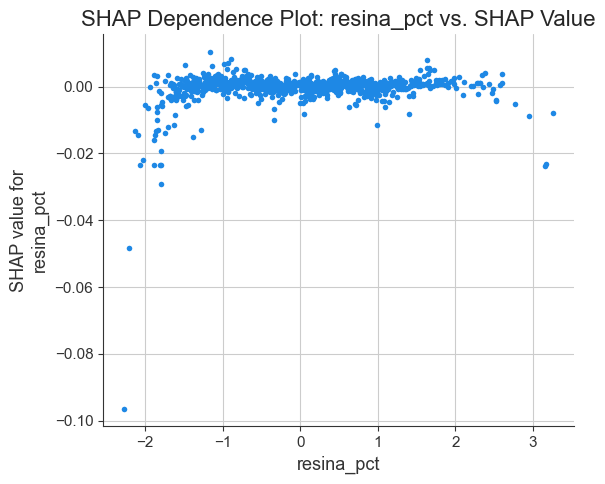

Gráfico 'shap_dependence_resina_pct.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (SHAP Dependence Plot para resina_pct):
Este gráfico nos ayuda a entender la relación entre una característica específica y su impacto en la predicción del modelo.
  - El eje X muestra el valor real de la característica (ej. porcentaje de resina).
  - El eje Y muestra el valor SHAP, es decir, cuánto esa característica en particular está impulsando la predicción (hacia éxito o falla).
  - Los puntos representan formulaciones individuales. El color de los puntos puede indicar una segunda característica para ver interacciones.
  - **Para Leonardo:** Aquí puede ver si existe un 'punto dulce' o un umbral para una característica. Por ejemplo, ¿un porcentaje de resina demasiado bajo o demasiado alto siempre lleva a una falla?
Esto es clave para refinar sus pautas de formulación y entender los límites óptimos de cada ingrediente o condición.


<Figure size 1000x600 with 0 Axes>

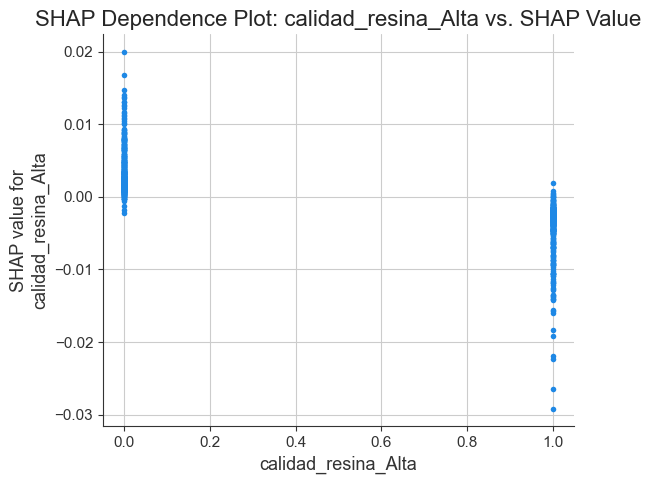

Gráfico 'shap_dependence_calidad_resina_Alta.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (SHAP Dependence Plot para calidad_resina_Alta):
Este gráfico nos ayuda a entender la relación entre una característica específica y su impacto en la predicción del modelo.
  - El eje X muestra el valor real de la característica (ej. porcentaje de resina).
  - El eje Y muestra el valor SHAP, es decir, cuánto esa característica en particular está impulsando la predicción (hacia éxito o falla).
  - Los puntos representan formulaciones individuales. El color de los puntos puede indicar una segunda característica para ver interacciones.
  - **Para Leonardo:** Aquí puede ver si existe un 'punto dulce' o un umbral para una característica. Por ejemplo, ¿un porcentaje de resina demasiado bajo o demasiado alto siempre lleva a una falla?
Esto es clave para refinar sus pautas de formulación y entender los límites óptimos de cada ingrediente o cond

<Figure size 1000x600 with 0 Axes>

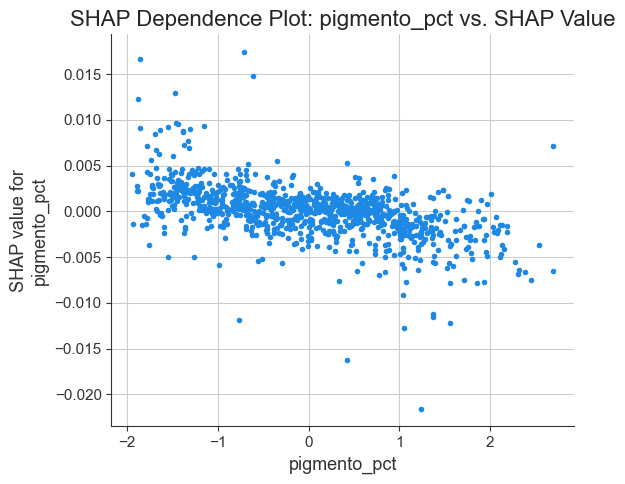

Gráfico 'shap_dependence_pigmento_pct.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (SHAP Dependence Plot para pigmento_pct):
Este gráfico nos ayuda a entender la relación entre una característica específica y su impacto en la predicción del modelo.
  - El eje X muestra el valor real de la característica (ej. porcentaje de resina).
  - El eje Y muestra el valor SHAP, es decir, cuánto esa característica en particular está impulsando la predicción (hacia éxito o falla).
  - Los puntos representan formulaciones individuales. El color de los puntos puede indicar una segunda característica para ver interacciones.
  - **Para Leonardo:** Aquí puede ver si existe un 'punto dulce' o un umbral para una característica. Por ejemplo, ¿un porcentaje de resina demasiado bajo o demasiado alto siempre lleva a una falla?
Esto es clave para refinar sus pautas de formulación y entender los límites óptimos de cada ingrediente o condición.


<Figure size 1000x600 with 0 Axes>

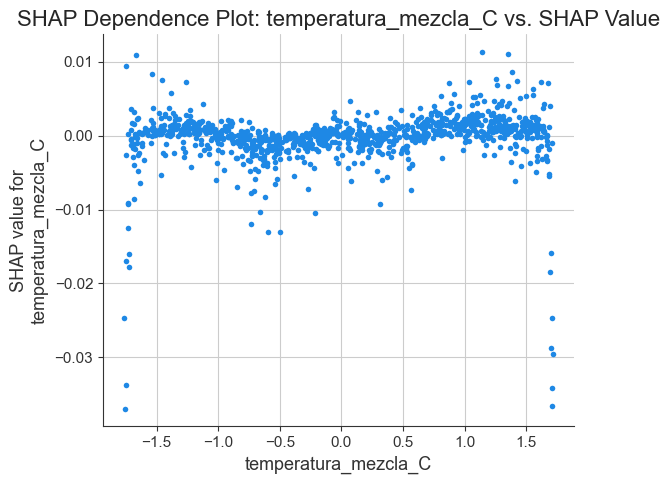

Gráfico 'shap_dependence_temperatura_mezcla_C.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (SHAP Dependence Plot para temperatura_mezcla_C):
Este gráfico nos ayuda a entender la relación entre una característica específica y su impacto en la predicción del modelo.
  - El eje X muestra el valor real de la característica (ej. porcentaje de resina).
  - El eje Y muestra el valor SHAP, es decir, cuánto esa característica en particular está impulsando la predicción (hacia éxito o falla).
  - Los puntos representan formulaciones individuales. El color de los puntos puede indicar una segunda característica para ver interacciones.
  - **Para Leonardo:** Aquí puede ver si existe un 'punto dulce' o un umbral para una característica. Por ejemplo, ¿un porcentaje de resina demasiado bajo o demasiado alto siempre lleva a una falla?
Esto es clave para refinar sus pautas de formulación y entender los límites óptimos de cada ingrediente o co

<Figure size 1000x600 with 0 Axes>

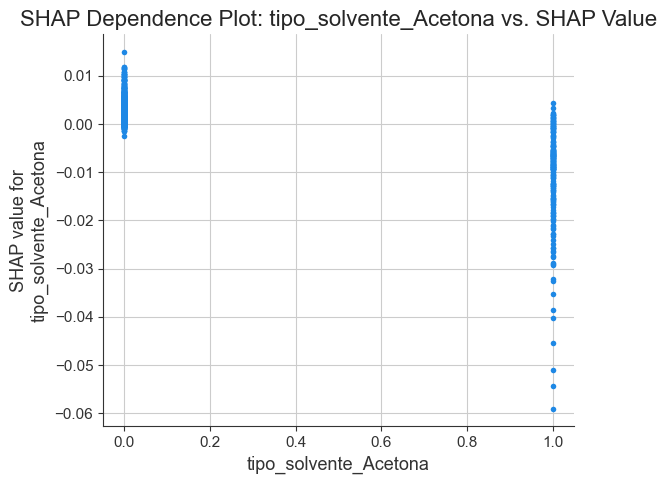

Gráfico 'shap_dependence_tipo_solvente_Acetona.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (SHAP Dependence Plot para tipo_solvente_Acetona):
Este gráfico nos ayuda a entender la relación entre una característica específica y su impacto en la predicción del modelo.
  - El eje X muestra el valor real de la característica (ej. porcentaje de resina).
  - El eje Y muestra el valor SHAP, es decir, cuánto esa característica en particular está impulsando la predicción (hacia éxito o falla).
  - Los puntos representan formulaciones individuales. El color de los puntos puede indicar una segunda característica para ver interacciones.
  - **Para Leonardo:** Aquí puede ver si existe un 'punto dulce' o un umbral para una característica. Por ejemplo, ¿un porcentaje de resina demasiado bajo o demasiado alto siempre lleva a una falla?
Esto es clave para refinar sus pautas de formulación y entender los límites óptimos de cada ingrediente o 

In [7]:
print("\n--------------------------------------------------")
print("4. ANÁLISIS SHAP DETALLADO POR CARACTERÍSTICA")
print("--------------------------------------------------")

top_features_to_plot = ['resina_pct', 'calidad_resina_Alta', 'pigmento_pct',
                        'temperatura_mezcla_C', 'tipo_solvente_Acetona'] # Ejemplos

print(f"\nGenerando gráficos de dependencia SHAP para las características: {top_features_to_plot}")

for feature in top_features_to_plot:
    plt.figure(figsize=(10, 6))
    
    try:
        if shap_values_for_plot.shape != X_test.values.shape:
            print(f"SKIPPING DEPENDENCE PLOT for {feature}: SHAP values shape mismatch. Expected {X_test.values.shape}, got {shap_values_for_plot.shape}.")
            continue

        shap.dependence_plot(feature, shap_values_for_plot, X_test.values, feature_names=feature_names_processed,
                             interaction_index=None, show=False)
        plt.title(f'SHAP Dependence Plot: {feature} vs. SHAP Value', fontsize=16)
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f'shap_dependence_{feature.replace(" ", "_")}.png'))
        plt.show()
        print(f"Gráfico 'shap_dependence_{feature.replace(' ', '_')}.png' guardado en {plots_dir}")

        print(f"\nExplicación para Leonardo (SHAP Dependence Plot para {feature}):")
        print("Este gráfico nos ayuda a entender la relación entre una característica específica y su impacto en la predicción del modelo.")
        print("  - El eje X muestra el valor real de la característica (ej. porcentaje de resina).")
        print("  - El eje Y muestra el valor SHAP, es decir, cuánto esa característica en particular está impulsando la predicción (hacia éxito o falla).")
        print("  - Los puntos representan formulaciones individuales. El color de los puntos puede indicar una segunda característica para ver interacciones.")
        print("  - **Para Leonardo:** Aquí puede ver si existe un 'punto dulce' o un umbral para una característica. Por ejemplo, ¿un porcentaje de resina demasiado bajo o demasiado alto siempre lleva a una falla?")
        print("Esto es clave para refinar sus pautas de formulación y entender los límites óptimos de cada ingrediente o condición.")

    except Exception as e:
        print(f"ERROR al generar Dependence Plot para '{feature}': {e}")
        print("Esto podría ser causado por la misma inconsistencia de formas en los SHAP values.")

In [8]:
print("\n--------------------------------------------------")
print("ANÁLISIS SHAP COMPLETADO.")
print("Hemos desglosado las predicciones de nuestros modelos para entender su lógica interna.")
print("Revisa los gráficos generados en la carpeta 'plots/' y las explicaciones detalladas en este notebook.")
print("--------------------------------------------------")


--------------------------------------------------
ANÁLISIS SHAP COMPLETADO.
Hemos desglosado las predicciones de nuestros modelos para entender su lógica interna.
Revisa los gráficos generados en la carpeta 'plots/' y las explicaciones detalladas en este notebook.
--------------------------------------------------
